# Deep Learning Fundamentals

## What is deep learning?

**Deep learning** is a subset of machine learning, consisting of algorithms inspired by the structure of a human brain. It is particularly useful for working with unstructured data which nevertheless follows some internal rules: images, videos, text, etc.

In [ ]:
import numpy as np

# Define input data
input_data = np.array([3,5])

#Define weights
weights = { 'node_0': np.array([2, 4]),
            'node_1': np.array([ 4, -5]),
            'output': np.array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()
print(node_0_value)

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()
print(node_1_value)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])
print(hidden_layer_outputs)

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)

26
-13
[ 26 -13]
-39


## Activation Functions

For neural networks to achieve their maximum predictive power, we must apply something called an **activation function** in the hidden layers. An activation function allows the model to capture non-linearities - without these, our neural network would be no different from a standard linear model! These functions are asssociated to each node, and are applied to node inputs to produce node outputs:

![](activation.png)

The **Rectified Linear Unit (ReLU)** function is the most widely-used activation function in neural networks today. One of the greatest advantages ReLU has over other activation functions is that it does not activate all neurons at the same time. From the image for ReLU function above, we’ll notice that it converts all negative inputs to zero and the neuron does not get activated. This makes it very computationally efficient as few neurons are activated at any given time. In practice, ReLU converges six times faster than other functions like `tanh` and sigmoid.

In [ ]:
def relu(input):
    '''relu activation function'''
    output = max(0, input)
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [ ]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    # Return model output
    return(model_output)

input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)

[52, 63, 0, 148]


<img src="multiplehiddenlayers1.png" width="500">

In [ ]:
def predict_with_network(input_data):
     # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()

    # Return model_output
    return(model_output)
weights ={  'node_0_0': np.array([2, 4]),
            'node_0_1': np.array([ 4, -5]),
            'node_1_0': np.array([-1,  2]),
            'node_1_1': np.array([1, 2]),
            'output': np.array([2, 7])}

input_data = np.array([3, 5])
output = predict_with_network(input_data)
print(output)

182


In [ ]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    # Return model output
    return(model_output)

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [ ]:
from sklearn.metrics import mean_squared_error

# Create model_output_0
model_output_0 = []
# Create model_output_1
model_output_1 = []

input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1, 2]),
    'output': np.array([1, 1])}
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1. , 1.5]),
    'output': np.array([1. , 1.5])}
# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))

    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [ ]:
# Calculate the predictions: preds
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[14 28 42]


In [ ]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


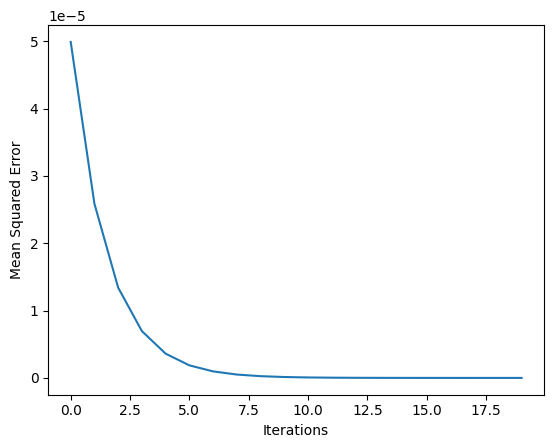

In [ ]:
import matplotlib.pyplot as plt

n_updates = 20
mse_hist = []
input_data = np.array([1, 2, 3])
target = 0
weights = np.array([-0.49929916,  1.00140168, -0.49789747])

def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return input_data * error * 2

def get_mse(input_data, target, weights):
    preds = (weights * input_data).sum()
    return mean_squared_error([preds], [target])

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    #print(slope)
    # Update the weights: weights
    weights = weights - 0.01 * slope
    #print(weights)
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    #print(mse)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Creating a `keras` model

There are a few different libraries at our disposal for creating a neural network model:

Here, we will go with `keras`.

In [ ]:
# Parents heights vs children heights (Galton data) (kaggle.com)
#https://www.kaggle.com/datasets/jacopoferretti/parents-heights-vs-children-heights-galton-data?resource=download
# El objetivo principal de este estudio fue establecer una relación entre la
# altura de los niños y los padres. Galton también quería saber si la selección
# del matrimonio indica una relación entre la altura del marido y la de su esposa

import pandas as pd

df = pd.read_csv('GaltonFamilies.csv')
df.head()


,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [ ]:
#Any missing values?

df.isnull().sum()

rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

In [ ]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [ ]:
df1 = df.copy()

#Eliminando las columnas rownames y children
df1 = df1.drop(columns=['rownames'])
df1 = df1.drop(columns=['children'])


# Eliminar las columnas family
df1 = df1.drop(columns=['family'])

# reemplazar la columna gender por números para el clasificador
df1["gender"] = df1["gender"].replace({"male": 0, "female": 1})
df1.head()


,father,mother,midparentHeight,childNum,gender,childHeight
0,78.5,67.0,75.43,1,0,73.2
1,78.5,67.0,75.43,2,1,69.2
2,78.5,67.0,75.43,3,1,69.0
3,78.5,67.0,75.43,4,1,69.0
4,75.5,66.5,73.66,1,0,73.5


In [ ]:
#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia

n_dup = len(df1) - len(df1.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 23
Number of duplicate rows: 23


In [ ]:
# revisando cuantos valores hay por cada clase
counts = df["gender"].value_counts()
print (counts)
#plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

gender
0    463
1    448
Name: count, dtype: int64


In [ ]:
dataset = df1.values
dataset

array([[78.5 , 67.  , 75.43,  1.  ,  0.  , 73.2 ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  , 69.2 ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  , 69.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  , 61.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  , 66.5 ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  , 57.  ]])

In [ ]:
X = dataset[:,0:5]
X

array([[78.5 , 67.  , 75.43,  1.  ,  0.  ],
       [78.5 , 67.  , 75.43,  2.  ,  1.  ],
       [78.5 , 67.  , 75.43,  3.  ,  1.  ],
       ...,
       [62.  , 66.  , 66.64,  3.  ,  1.  ],
       [62.5 , 63.  , 65.27,  1.  ,  0.  ],
       [62.5 , 63.  , 65.27,  2.  ,  1.  ]])

In [ ]:
Y = dataset[:,5]
Y

array([73.2, 69.2, 69. , 69. , 73.5, 72.5, 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       76.5, 74. , 73. , 73. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       74. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 71. , 62. ,
       68. , 67. , 71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7,
       66.5, 64.5, 63.5, 74. , 73. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5,
       64. , 62.7, 73.2, 73. , 72.7, 70. , 69. , 68.5, 68. , 66. , 73. ,
       68.5, 68. , 73. , 71. , 67. , 74.2, 70.5, 69.5, 66. , 65.5, 65. ,
       65. , 65.5, 66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. ,
       63. , 73. , 67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. ,
       71. , 70. , 70. , 66. , 65. , 65. , 74. , 72. , 69. , 67.5, 63.5,
       72. , 71.5, 71.5, 70. , 68. , 65.7, 78. , 74. , 73. , 72. , 67. ,
       73.2, 73. , 69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5,
       66. , 64.5, 63. , 71. , 67. , 76. , 72. , 71

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.72      , 1.        , 0.        , 0.        ],
       [1.        , 0.72      , 1.        , 0.07142857, 1.        ],
       [1.        , 0.72      , 1.        , 0.14285714, 1.        ],
       ...,
       [0.        , 0.64      , 0.2030825 , 0.14285714, 1.        ],
       [0.03030303, 0.4       , 0.07887579, 0.        , 0.        ],
       [0.03030303, 0.4       , 0.07887579, 0.07142857, 1.        ]])

In [ ]:
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1)  )
Y_scale

array([[0.74782609],
       [0.57391304],
       [0.56521739],
       [0.56521739],
       [0.76086957],
       [0.7173913 ],
       [0.41304348],
       [0.41304348],
       [0.65217391],
       [0.52173913],
       [0.63043478],
       [0.54347826],
       [0.47826087],
       [0.36956522],
       [0.30434783],
       [0.69565217],
       [0.56521739],
       [0.52173913],
       [0.45652174],
       [0.2826087 ],
       [0.2826087 ],
       [0.58695652],
       [0.89130435],
       [0.7826087 ],
       [0.73913043],
       [0.73913043],
       [0.63043478],
       [0.34782609],
       [0.63043478],
       [0.52173913],
       [0.43478261],
       [0.43478261],
       [0.41304348],
       [0.7826087 ],
       [0.60869565],
       [0.52173913],
       [0.47826087],
       [0.47826087],
       [0.43478261],
       [0.32608696],
       [0.30434783],
       [0.39130435],
       [0.65217391],
       [0.26086957],
       [0.52173913],
       [0.47826087],
       [0.65217391],
       [0.630

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# Eliminar una fila específica (por ejemplo, la primera fila)
X_test = np.delete(X_test, 0, axis=0)
Y_test = np.delete(Y_test, 0, axis=0)

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_val:", len(Y_val))
print("Longitud de Y_train:", len(Y_train))

Longitud de Y_test: 140
Longitud de Y_val: 140
Longitud de Y_train: 653


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(653, 5) (140, 5) (140, 5) (653, 1) (140, 1) (140, 1)


### Setting up the architecture

The architecture that we want to implement is this:


- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Crear una instancia de MLPCLassifier
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(32, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=100,
                     random_state=42,
                     verbose=True)

In [ ]:
# Asegurarse de que y_train y y_test tengan la forma correcta
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Entrenar el modelo
model.fit(X_train, Y_train)

#Realizar predicciones del modelo en el conjunto de prueba
Y_pred = model.predict(X_test)
#print (Y_test)
#print(Y_pred)


Iteration 1, loss = 0.30308572
Iteration 2, loss = 0.23831362
Iteration 3, loss = 0.18459261
Iteration 4, loss = 0.14132881
Iteration 5, loss = 0.10716113
Iteration 6, loss = 0.08173584
Iteration 7, loss = 0.06282006
Iteration 8, loss = 0.04909292
Iteration 9, loss = 0.03969430
Iteration 10, loss = 0.03276566
Iteration 11, loss = 0.02717073
Iteration 12, loss = 0.02288460
Iteration 13, loss = 0.01937690
Iteration 14, loss = 0.01634224
Iteration 15, loss = 0.01362958
Iteration 16, loss = 0.01109002
Iteration 17, loss = 0.00890387
Iteration 18, loss = 0.00714909
Iteration 19, loss = 0.00600253
Iteration 20, loss = 0.00532780
Iteration 21, loss = 0.00501920
Iteration 22, loss = 0.00491381
Iteration 23, loss = 0.00487934
Iteration 24, loss = 0.00483960
Iteration 25, loss = 0.00476985
Iteration 26, loss = 0.00467969
Iteration 27, loss = 0.00459049
Iteration 28, loss = 0.00452114
Iteration 29, loss = 0.00447002
Iteration 30, loss = 0.00443254
Iteration 31, loss = 0.00440528
Iteration 32, los

Longitud de Y_test: 140
Longitud de Y_pred: 140
Longitud de Y_train: 653
R^2 score =  0.6698722559627769
Mean Squared Error =  0.007667772778108038
Root Mean Squared Error =  0.08756581969072201
Mean Absolute Error =  0.07003825115049654


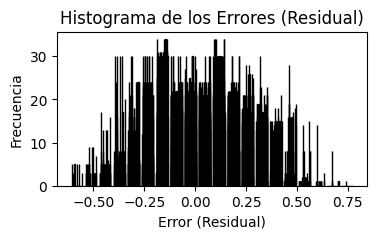

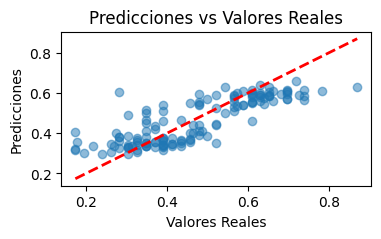

In [ ]:
# Evaluar el modelo

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Importar métricas de regresión

print("Longitud de Y_test:", len(Y_test))
print("Longitud de Y_pred:", len(Y_pred))
print("Longitud de Y_train:", len(Y_train))

# Asegurarse de que las longitudes sean iguales
assert len(Y_test) == len(Y_pred), "Las longitudes de Y_test y Y_val deben ser iguales"

#Calcula la precisión del modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#print("Precisión del modelo (Accuracy):", accuracy)

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(Y_test, Y_pred)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [ ]:
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, Y_val))

Epoch 1/120
21/21 [==============================] - 1s 17ms/step - loss: 0.0255 - accuracy: 0.0015 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 2/120
21/21 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.0031 - val_loss: 0.0219 - val_accuracy: 0.0000e+00
Epoch 3/120
21/21 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.0031 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 4/120
21/21 [==============================] - 0s 6ms/step - loss: 0.0238 - accuracy: 0.0031 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 5/120
21/21 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.0031 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 6/120
21/21 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.0031 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 7/120
21/21 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.0031 - val_loss: 0.0193 - val_accur

In [ ]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.0000e+00


0.0

### Visualizing loss and accuracy

A good model is one where the testing and training set errors are very similar, and at their lowest point.

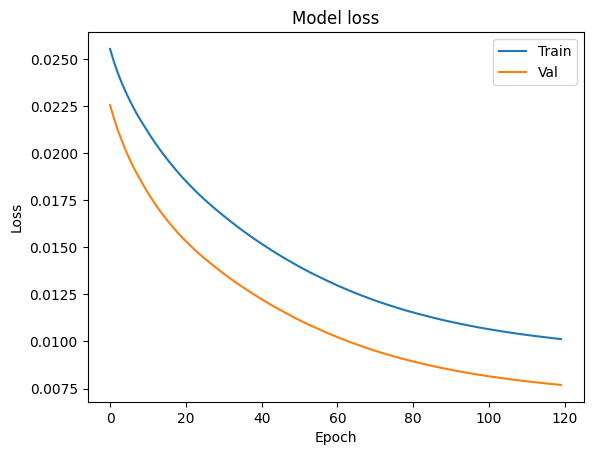

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

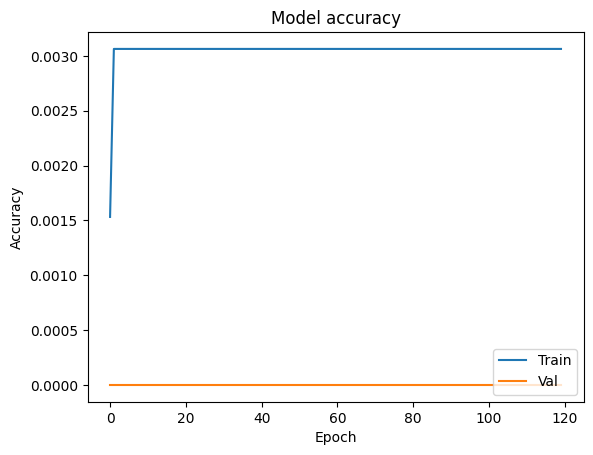

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding regularization to our network

Our model is overfitting. Similarly to simpler machine learning models, we can add **regularization** to our neural network to help correct this. However, the exact types of regularization are somewhat different than the ones used for our usual classification models, and go by different names:

- L2 Regularization
- Early Stopping
- Dropout




In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss = 'mean_squared_error', #mse
              #loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 [==============================] - 3s 79ms/step - loss: 0.0071 - accuracy: 0.0031 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 2s 76ms/step - loss: 0.0068 - accuracy: 0.0031 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 2s 79ms/step - loss: 0.0064 - accuracy: 0.0031 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0063 - accuracy: 0.0031 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0065 - accuracy: 0.0031 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0067 - accuracy: 0.0031 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0062 - accuracy: 0.0031 - val_loss: 0.0059 - val

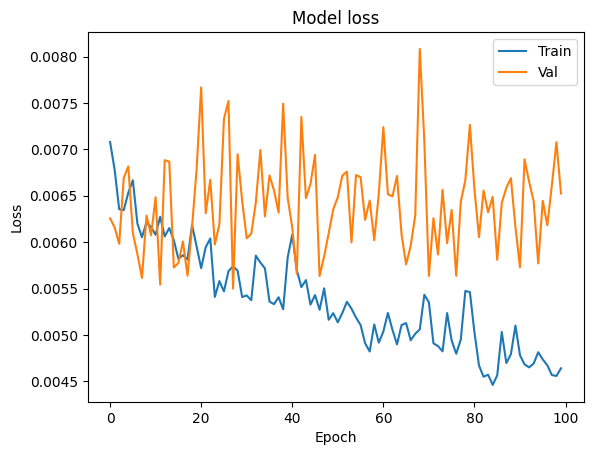

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

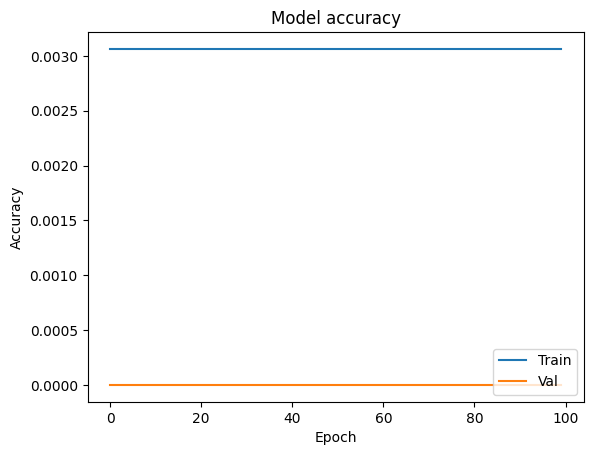

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
             # loss='binary_crossentropy',
               loss = 'mean_squared_error', #mse
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
21/21 [==============================] - 4s 106ms/step - loss: 17.8810 - accuracy: 0.0015 - val_loss: 7.7431 - val_accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 2s 86ms/step - loss: 3.9445 - accuracy: 0.0015 - val_loss: 1.2645 - val_accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 1s 56ms/step - loss: 0.5585 - accuracy: 0.0015 - val_loss: 0.1351 - val_accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 1s 55ms/step - loss: 0.0666 - accuracy: 0.0015 - val_loss: 0.0288 - val_accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 1s 55ms/step - loss: 0.0283 - accuracy: 0.0015 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 1s 57ms/step - loss: 0.0258 - accuracy: 0.0015 - val_loss: 0.0219 - val_accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 1s 55ms/step - loss: 0.0253 - accuracy: 0.0015 - val_loss: 0.0218 - v

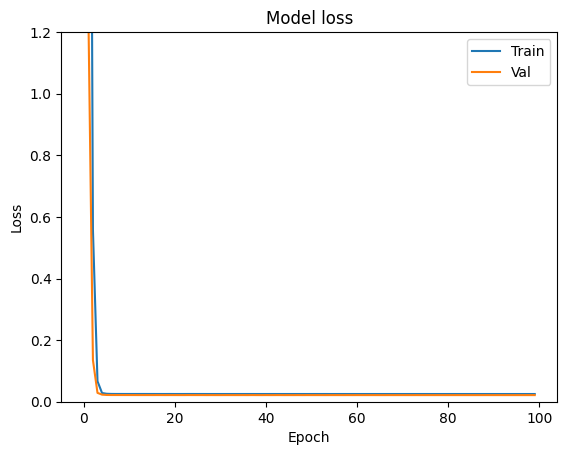

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

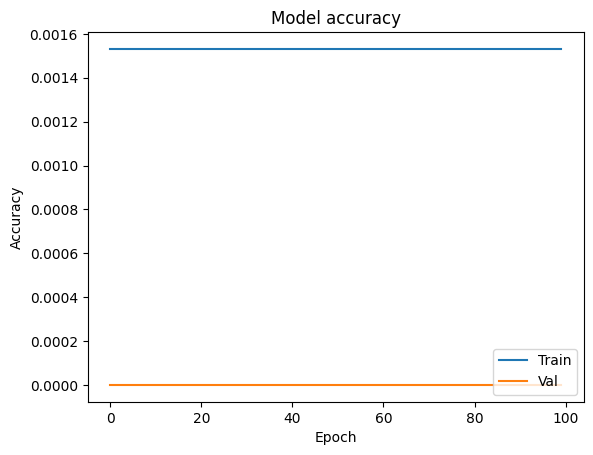

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

R^2 score =  -0.5799210666896986
Mean Squared Error =  0.0366963273021874
Root Mean Squared Error =  0.19156285470358653
Mean Absolute Error =  0.15698757763975152


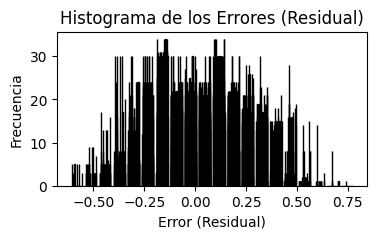

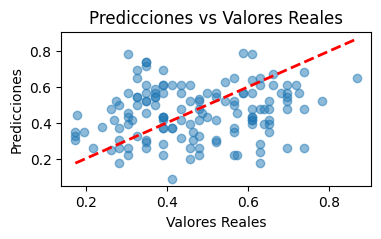

In [ ]:

# Evaluar el modelo con métricas de regresión
r2 = r2_score(Y_test, Y_val)
mse = mean_squared_error(Y_test, Y_val)
rmse = mean_squared_error(Y_test, Y_val)**0.5
mae = mean_absolute_error(Y_test, Y_val)

print('R^2 score = ', r2)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('Mean Absolute Error = ', mae)

# Calcular los errores (residuales)
error = Y_test - Y_val

# Mostrar el histograma de los errores
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error (Residual)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Errores (Residual)')
plt.show()

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.scatter(Y_test, Y_val, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()